In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('auto-mpg.csv', header = 0, engine = 'python')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [2]:
df = df.drop(['car_name', 'origin', 'horsepower'], axis=1, inplace=False)
df.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [4]:
print('데이터셋 크기: ', df.shape)

데이터셋 크기:  (398, 6)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# X, Y 분할하기
Y = df['mpg']
X = df.drop(['mpg'], axis = 1, inplace = False)

In [9]:
# 훈련용 데이터, 평가용 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [10]:
# 선형회귀 분석 : 모델 생성
lr = LinearRegression()

In [11]:
# 선형회귀 분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [17]:
# 선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_answer = lr.predict(X_test)

mse = mean_squared_error(Y_test, Y_answer)
rmse = np.sqrt(mse)
rmse

In [14]:
mse = mean_squared_error(Y_test, Y_answer)
rmse = np.sqrt(mse)
rmse

3.5040318258556735

In [15]:
np.round(lr.coef_, 2)

array([-0.14,  0.01, -0.01,  0.2 ,  0.76])

In [16]:
X_train[:2]

,cylinders,displacement,weight,acceleration,model_year
230,8,350.0,4165,11.4,77
357,4,119.0,2615,14.8,81


In [18]:
np.round(lr.intercept_, 2)

-17.55

In [19]:
import seaborn as sns

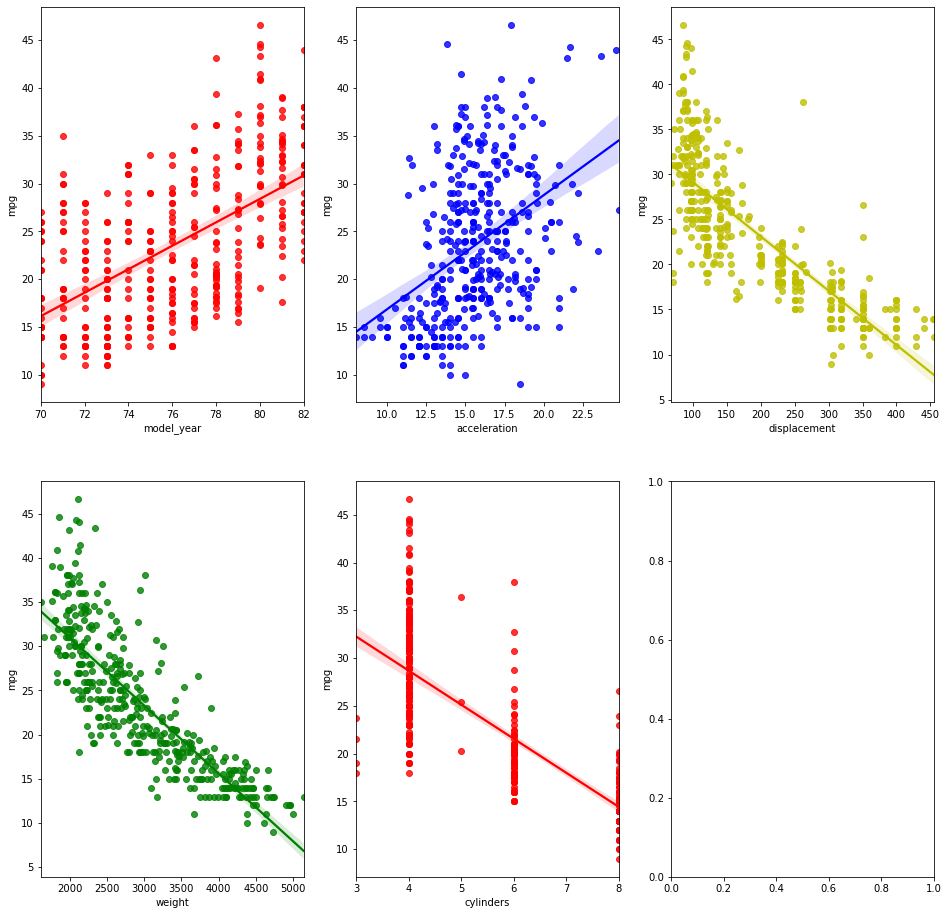

In [22]:
fig, axes = plt.subplots(2, 3, figsize = (16,16))
x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']
for i, feature in enumerate(x_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x = feature, y = 'mpg', data = df, ax = axes[row][col], color = plot_color[i])

In [23]:
df.corr(method='pearson')

,mpg,cylinders,displacement,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000


In [24]:
pd.__version__

'1.2.4'

In [3]:
!pip install pandas == 0.24.2

ERROR: Invalid requirement: '=='


In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [7]:
X_train_s = scaler.transform(X_train)

In [8]:
print(X_train.shape, X_train_s.shape)

(426, 30) (426, 30)


In [ ]:
X_test_s = scaler.transform(X_test)

In [ ]:
print(X_test.max(axis=0), X_test_s.max(axis=0))

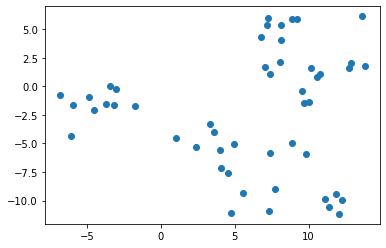

In [12]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [13]:
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

Text(0.5, 1.0, 'scaled bad')

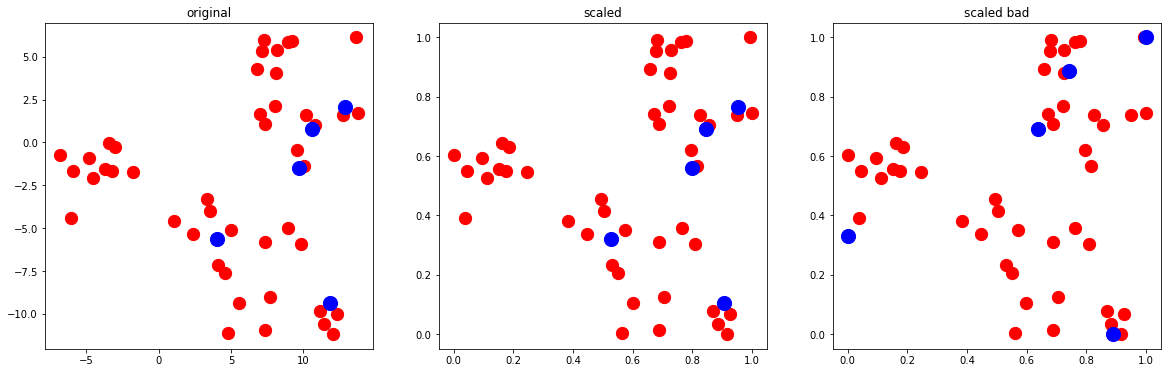

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
axes[0].scatter(X_train[:,0], X_train[:,1], c="r", s=150)
axes[0].scatter(X_test[:,0], X_test[:,1], c="b", s=200)
axes[0].set_title("original")

scaler = MinMaxScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

axes[1].scatter(X_train_s[:,0], X_train_s[:,1], c="r", s=150)
axes[1].scatter(X_test_s[:,0], X_test_s[:,1], c="b", s=200)
axes[1].set_title("scaled")

scaler = MinMaxScaler().fit(X_test)
X_test_s = scaler.transform(X_test)

axes[2].scatter(X_train_s[:,0], X_train_s[:,1], c="r", s=150)
axes[2].scatter(X_test_s[:,0], X_test_s[:,1], c="b", s=200)
axes[2].set_title("scaled bad")

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
from sklearn.svm import SVC
svm = SVC(gamma='auto').fit(X_train, y_train)
svm.score(X_test, y_test)

0.6153846153846154

In [26]:
scalar = MinMaxScaler().fit(X_train)
X_train_s = scalar.transform(X_train)
X_test_s = scalar.transform(X_test)

svm = SVC(gamma='auto').fit(X_train_s, y_train)
svm.score(X_test_s, y_test)

0.9440559440559441

In [27]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler().fit(X_train)
X_train_s = scalar.transform(X_train)
X_test_s = scalar.transform(X_test)

svm = SVC(gamma='auto').fit(X_train_s, y_train)
svm.score(X_test_s, y_test)

0.965034965034965

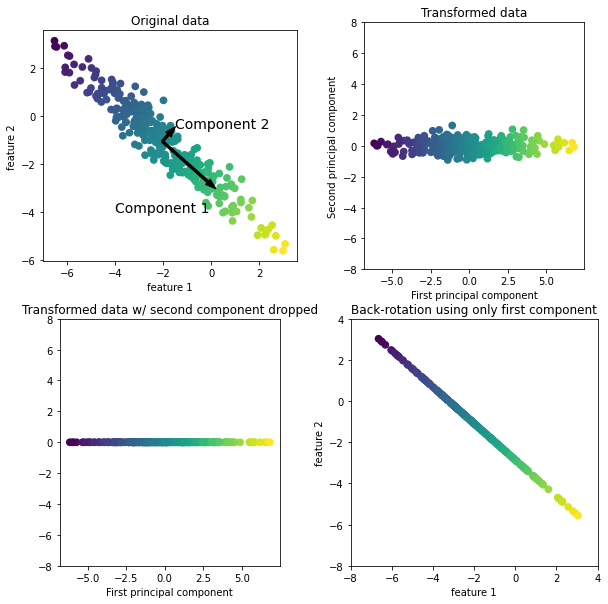

In [29]:
import mglearn
mglearn.plots.plot_pca_illustration()

In [30]:
X_train_S

NameError: name 'X_train_S' is not defined

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train_s)
X_train_pca = pca.transform(X_train_s)

In [33]:
X_train_s.shape

(426, 30)

In [34]:
X_train_pca.shape

(426, 2)

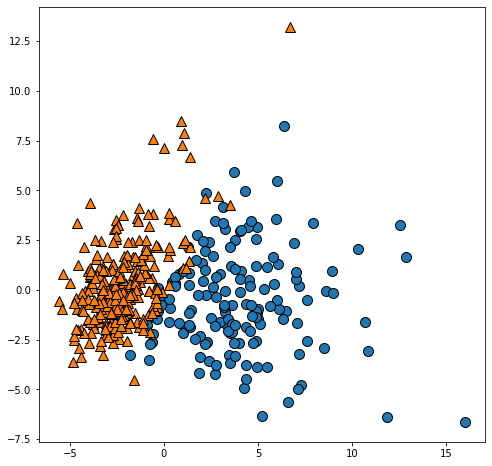

In [35]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1], y_train)

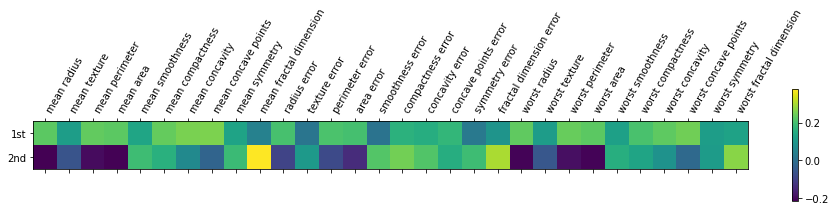

In [41]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],['1st','2nd'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.show()

In [42]:
from sklearn.datasets import fetch_lfw_people

In [43]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

In [44]:
image_shape = people.images[0].shape

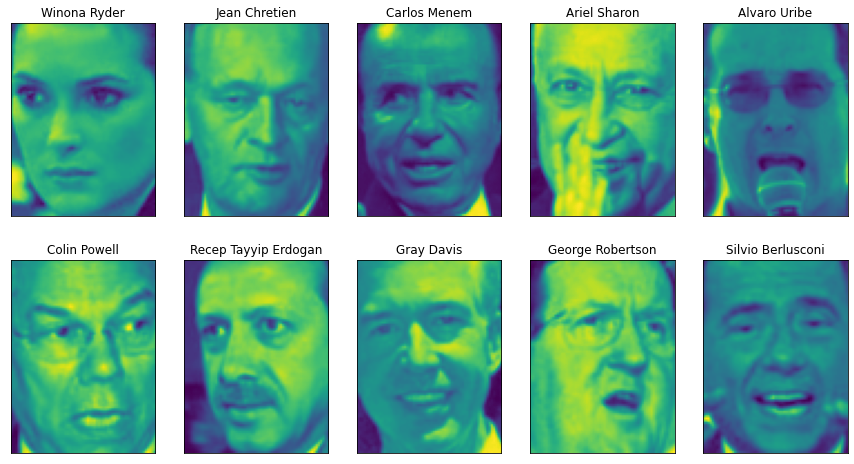

In [47]:
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [48]:
people.target_names.shape

(62,)

In [50]:
import numpy as np
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name,count), end='    ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                71    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             52    Jean Chretien              55    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


In [51]:
mask = np.zeros(people.target.shape, dtype=np.bool)
mask

<ipython-input-51-a3de969a728b>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


array([False, False, False, ..., False, False, False])

In [52]:
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

In [54]:
print(X_people[0].min(), X_people[0].max())
print(X_people[1].min(), X_people[1].max())
print(X_people[2].min(), X_people[2].max())

0.045751635 0.9607843
0.0052287583 0.94509804
0.018300653 0.99346405


In [55]:
# 0~255 사이의 흑백 이미지 픽셀 값을 0~1 스케일로 조정
X_people = X_people / 255.

In [56]:
print(X_people[0].min(), X_people[0].max())
print(X_people[1].min(), X_people[1].max())
print(X_people[2].min(), X_people[2].max())

0.00017941817 0.0037677817
2.0504935e-05 0.0037062669
7.176727e-05 0.0038959375


In [57]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.23255813953488372

In [58]:
knn2 = KNeighborsClassifier(n_neighbors=2)
knn2.fit(X_train, y_train)
knn2.score(X_test, y_test)

0.2131782945736434

In [59]:
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
knn3.score(X_test, y_test)

0.2189922480620155

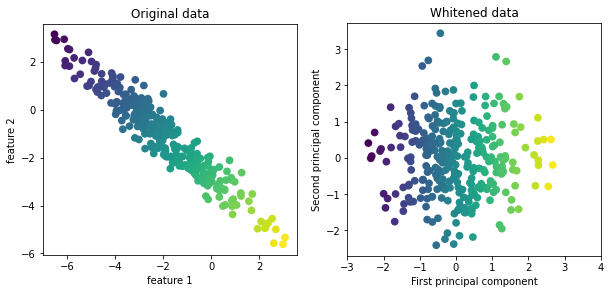

In [60]:
mglearn.plots.plot_pca_whitening()

In [61]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
X_train_pca.shape

(1547, 100)